In [2]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt


In [38]:
df = pd.read_excel('hurricanes.xlsx', sheet_name='Cape Hatteras NS', header=2).dropna()
totalCount = df.groupby(['Year'])['Year'].count().rename("count").to_frame().reset_index()
totalCount.head()

,Year,count
0,1995,1
1,1996,3
2,1997,2
3,1998,2
4,1999,3


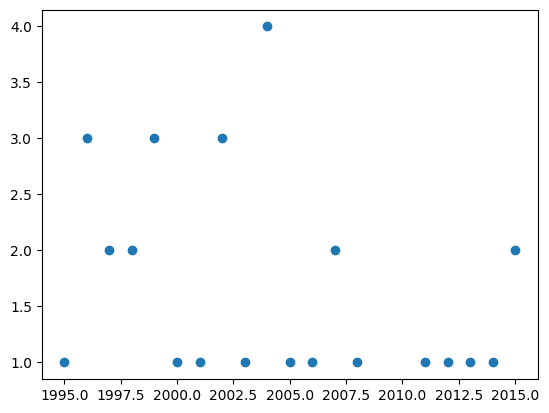

In [39]:
# graph dataframe with year on x-axis and count on y-axis with matplotlib
plt.scatter(totalCount['Year'], totalCount['count'])
plt.show()

In [40]:
# change Year column in totalCount to be start and end year array
totalCount['Year'] = totalCount['Year'].apply(lambda x: [x, x+1])
totalCount

,Year,count
0,"[1995, 1996]",1
1,"[1996, 1997]",3
2,"[1997, 1998]",2
3,"[1998, 1999]",2
4,"[1999, 2000]",3
5,"[2000, 2001]",1
6,"[2001, 2002]",1
7,"[2002, 2003]",3
8,"[2003, 2004]",1
9,"[2004, 2005]",4


In [41]:
# fit data with poisson regression
model = linear_model.PoissonRegressor()
model.fit(totalCount['Year'].tolist(), totalCount['count'].tolist())

PoissonRegressor()

In [42]:
# print model results
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
print('Mean: \n', model.predict([[2018, 2019]]))
#print score
print('Score: \n', model.score(totalCount['Year'].tolist(), totalCount['count'].tolist()))

Intercept: 
 60.32898535432482
Coefficients: 
 [-0.01491861 -0.01491861]
Mean: 
 [1.10799384]
Score: 
 0.1243177635144942


In [43]:
# predict hurricanes in 2020
print('Predicted hurricanes in 2020: \n', model.predict([[2020, 2021]]))

Predicted hurricanes in 2020: 
 [1.04380906]
